In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from utils.tools import gen_circular_distribution
from utils.models import NeuralNetwork
sns.set_theme()

In [5]:
x,y = gen_circular_distribution(n = 200)
# Convert arrays to tensors and split into batches
x_tensor, y_tensor = torch.tensor(x, dtype=torch.float64).view(-1,2), torch.tensor(y, dtype=torch.long).view(-1)
y_tensor = F.one_hot(y_tensor, num_classes = 2).to(dtype = torch.float64)

dataset = TensorDataset(x_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

### 4 layer NN, with 2 input/ output params

In [3]:
# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 4, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(4, 4, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(4, 2, dtype=torch.float64),
    nn.Softmax(), # Since this scales all outputs to sum to 1, we can look at outputs as probabilities
)

# Define the loss function and optimizer. Use cross entropy loss instead of MSE to accomodate 2 output params
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.1)

# Training data (assuming x and y are already defined as PyTorch tensors)
# ...

# Training loop
for epoch in range(1,n:=250):
    for batch in data_loader:
        batch_x, batch_y = batch
        # Forward pass
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/{n}], Loss: {loss.item()}')


d:\mambaforge\lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [10/250], Loss: 0.6260530588489804
Epoch [20/250], Loss: 0.5803741657607808
Epoch [30/250], Loss: 0.6606248761042903
Epoch [40/250], Loss: 0.5912880215785762
Epoch [50/250], Loss: 0.57580180578273
Epoch [60/250], Loss: 0.5000320670705318
Epoch [70/250], Loss: 0.7319068487846679
Epoch [80/250], Loss: 0.7719260484858252
Epoch [90/250], Loss: 0.38841374010977936
Epoch [100/250], Loss: 0.6152276164328169
Epoch [110/250], Loss: 0.6233686180754029
Epoch [120/250], Loss: 0.5566316037394583
Epoch [130/250], Loss: 0.4843199119847382
Epoch [140/250], Loss: 0.4400268871149149
Epoch [150/250], Loss: 0.4565492469318371
Epoch [160/250], Loss: 0.5584316344537592
Epoch [170/250], Loss: 0.45346273068634035
Epoch [180/250], Loss: 0.48699483321000137
Epoch [190/250], Loss: 0.545769654224777
Epoch [200/250], Loss: 0.5151891135610878
Epoch [210/250], Loss: 0.5345919667704504
Epoch [220/250], Loss: 0.5573016217834575
Epoch [230/250], Loss: 0.44077426658237256
Epoch [240/250], Loss: 0.6135324450351362


d:\mambaforge\lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


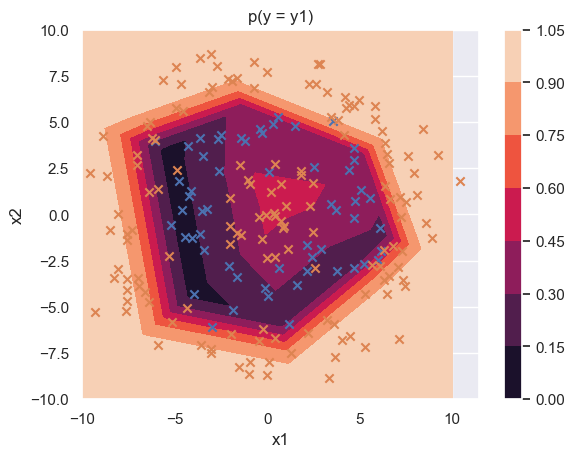

In [18]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions

x1_line, x2_line = np.linspace(-10,10,200), np.linspace(-10,10,200)
x1_grid, x2_grid = np.meshgrid(x1_line,x2_line)
Xgrid = np.array([x1_grid,x2_grid]).reshape([2,200*200]).T
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(torch.tensor(Xgrid))

y_pred = y_pred.detach().numpy()

# Plot class contours as predicted by model
fig, ax = plt.subplots()
contour = ax.contourf(x1_line,x2_line, np.reshape(y_pred[:,0], [200,200]))
fig.colorbar(contour)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('p(y = y1)')

#Plot training data
ax.scatter(x = x[y==1, 0], y = x[y==1,1], marker = 'x')
ax.scatter(x = x[y==0, 0], y = x[y==0,1], marker = 'x')

In [6]:
model = NeuralNetwork(layers = 5, input_dimension = 2, output_dimension = 2, hidden_nodes = 6, softmax =  True, activation_function = nn.ReLU())
model.train_model(x = x_tensor, y = y_tensor, epochs = 1000, optimizer=optim.SGD)

Epoch [10/1000], Loss: 0.5866763312293944
Epoch [20/1000], Loss: 0.7599966902953046
Epoch [30/1000], Loss: 0.4627178834835556
Epoch [40/1000], Loss: 0.6652849651807238
Epoch [50/1000], Loss: 0.6652049831047058
Epoch [60/1000], Loss: 0.6607957634308902
Epoch [70/1000], Loss: 0.6650580981737104
Epoch [80/1000], Loss: 0.7832451946154676
Epoch [90/1000], Loss: 0.5645606749096949
Epoch [100/1000], Loss: 0.5527391617778064
Epoch [110/1000], Loss: 0.5469198873851316
Epoch [120/1000], Loss: 0.7306518239284854
Epoch [130/1000], Loss: 0.743139174811136
Epoch [140/1000], Loss: 0.4361426270427845
Epoch [150/1000], Loss: 0.5488605946053278
Epoch [160/1000], Loss: 0.4806706118626842
Epoch [170/1000], Loss: 0.588918696037315
Epoch [180/1000], Loss: 0.75781328136782
Epoch [190/1000], Loss: 0.6398852512084401
Epoch [200/1000], Loss: 0.7759651436450756
Epoch [210/1000], Loss: 0.728557900265043
Epoch [220/1000], Loss: 0.6960171155395062
Epoch [230/1000], Loss: 0.6797109936258658
Epoch [240/1000], Loss: 0

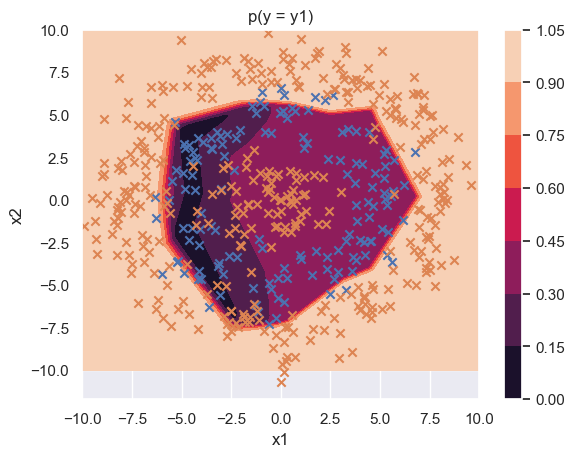

In [7]:
# Validation set
x,y = gen_circular_distribution(n = 500)
# Convert arrays to tensors and split into batches
x_tensor, y_tensor = torch.tensor(x, dtype=torch.float64).view(-1,2), torch.tensor(y, dtype=torch.long).view(-1)
y_tensor = F.one_hot(y_tensor, num_classes = 2).to(dtype = torch.float64)

x1_line, x2_line = np.linspace(-10,10,200), np.linspace(-10,10,200)
x1_grid, x2_grid = np.meshgrid(x1_line,x2_line)
Xgrid = np.array([x1_grid,x2_grid]).reshape([2,200*200]).T
y_pred = model.predict(Xgrid)

# Plot class contours as predicted by model
fig, ax = plt.subplots()
contour = ax.contourf(x1_line,x2_line, np.reshape(y_pred[:,0], [200,200]))
fig.colorbar(contour)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('p(y = y1)')

#Plot training data
ax.scatter(x = x[y==1, 0], y = x[y==1,1], marker = 'x')
ax.scatter(x = x[y==0, 0], y = x[y==0,1], marker = 'x')